In [ ]:
# !pip install tensorflow
# !pip install interpret

In [ ]:
# !pip show tensorflow

In [ ]:
# !pip install keras-tuner

In [ ]:
# !pip install scikeras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import interpolate
import numpy as np

sns.set()
# sns.set_theme(style="white", font='Times New Roman',font_scale=1.4)
# plt.rcParams['font.sans-serif'] = 'Times New Roman'
%matplotlib inline


data_path= '/content/drive/MyDrive/Dydaktyka/AI/raw_data2020.p'
data = pickle.load(open(data_path, "rb"))
dataPoolfont_sizefont_size = pickle.load(open(data_path, "rb" ) )

font_size = 20

MessageError: Error: credential propagation was unsuccessful

**List of data collected from one sampler**

| Data Type               | Data |
| -----------             | ----------- |
| Head-Tracking Data      | Raw Head Position(i.e., x, y and z) <br> Resampled Head Position(i.e., x, y and z) <br> Head Rotation(i.e., x, y and z) <br> Resampled Head Rotation(i.e., x, y and z) |
| Motion Data             | Raw Speed <br> Resampled Speed <br> Raw Rotation <br> Resampled Rotation     |
| Biosignal Data          | Galvanic Skin Response(4Hz) <br> Blood Volume Pulse(64Hz) <br> Heart Rate() <br> Temperature(4Hz)     |
| CyberSickness Data      | Simulator Sickness Questionnaire Score <br> Nausea Score <br> Oculomotor Score <br> Disorientation Score     |


In [ ]:
# @title Przeksztalcenie danych FINAL

# Resampling function
def resample_data(df, target_fs):
    # Assuming 'Time' is in seconds and is sorted
    time_col = 'Time'
    time_new = np.arange(df[time_col].iloc[0], 238.0, 1/target_fs)  # End at 238.0 seconds
    resampled_df = pd.DataFrame({time_col: time_new})

    for col in df.columns:
        if col != time_col:
            interpolator = interpolate.interp1d(df[time_col], df[col], kind='linear', fill_value="extrapolate")
            resampled_df[col] = interpolator(time_new)

    return resampled_df

# Define the target frequency (in Hz)
target_fs = 10  # Zmniejszenie częstotliwości próbkowania do 10 Hz (krok co 0.1 sekundy)

# Dictionary to store resampled data for each session
resampled_time_series_data = {}

# Process each session
for session_name, session in data.items():
    print(f"Próbka sesji: {session_name}")

    session_data = {}
    variables_columns = {
        'BVP': ['Time', 'BVP'],
        'GSR': ['Time', 'GSR'],
        'HR': ['Time', 'HR'],
        'TEM': ['Time', 'TEM'],
        'rawHead': ['Time', 'local_X', 'local_Y', 'local_Z']
    }

    for variable_name, columns in variables_columns.items():
        if variable_name in ['BVP', 'GSR', 'HR', 'TEM']:
            df = getattr(session.Empatica, variable_name)[columns]
        else:
            df = getattr(session.Steam, variable_name)[columns]

        resampled_df = resample_data(df, target_fs)
        session_data[variable_name] = resampled_df

        print(f"Dane dla zmiennej {variable_name}:")
        print(resampled_df)
        print("\n")

    resampled_time_series_data[session_name] = session_data

# Dane przepróbkowane z zakończeniem w 238.0 sekundzie dla każdej zmiennej w każdej sesji

Próbka sesji: Andreasgroup1.5
Dane dla zmiennej BVP:
       Time       BVP
0       0.0       NaN
1       0.1  3.986297
2       0.2  3.305411
3       0.3 -1.083429
4       0.4 -2.184076
...     ...       ...
2375  237.5 -8.509549
2376  237.6 -9.876010
2377  237.7  6.109310
2378  237.8 -0.811515
2379  237.9 -1.241498

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  2.532802
2       0.2  2.537808
3       0.3  2.542814
4       0.4  2.547819
...     ...       ...
2375  237.5  6.113805
2376  237.6  6.113019
2377  237.7  6.112233
2378  237.8  6.111446
2379  237.9  6.110660

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time          HR
0       0.0         NaN
1       0.1  106.633436
2       0.2  106.605171
3       0.3  106.576907
4       0.4  106.548643
...     ...         ...
2375  237.5   90.702082
2376  237.6   90.555624
2377  237.7   90.409166
2378  237.8   90.262709
2379  237.9   90.116251

[2380 rows x 2 columns]


Dane 

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

       Time        TEM
0       0.0        NaN
1       0.1  31.770000
2       0.2  31.770000
3       0.3  31.770000
4       0.4  31.770000
...     ...        ...
2375  237.5  32.469660
2376  237.6  32.467635
2377  237.7  32.465611
2378  237.8  32.463586
2379  237.9  32.461561

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.553917  1.583651  0.719572
1       0.1  1.558837  1.602721  0.723218
2       0.2  1.553861  1.602751  0.723545
3       0.3  1.551023  1.602822  0.723811
4       0.4  1.539509  1.602161  0.724849
...     ...       ...       ...       ...
2375  237.5  1.568577  1.603483  0.716063
2376  237.6  1.568005  1.603436  0.716781
2377  237.7  1.567403  1.603381  0.717435
2378  237.8  1.566480  1.603294  0.718491
2379  237.9  1.565320  1.603029  0.719343

[2380 rows x 4 columns]


Próbka sesji: Anjelagroupfuzzy
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  -4.144848
2       0.2  -4.

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: inv

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.104671  1.523103  0.805146
1       0.1  1.108015  1.571274  0.751489
2       0.2  1.108686  1.571478  0.751409
3       0.3  1.108976  1.571853  0.751014
4       0.4  1.110188  1.570682  0.752743
...     ...       ...       ...       ...
2375  237.5  1.137947  1.550717  0.805741
2376  237.6  1.137548  1.550350  0.806194
2377  237.7  1.137419  1.548627  0.806478
2378  237.8  1.137013  1.548106  0.806220
2379  237.9  1.136189  1.547892  0.805411

[2380 rows x 4 columns]


Próbka sesji: Arongroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1   1.985907
2       0.2   0.594896
3       0.3  -0.796115
4       0.4 -90.551537
...     ...        ...
2375  237.5  19.486719
2376  237.6  19.408619
2377  237.7 -12.519148
2378  237.8 -15.054172
2379  237.9   4.909244

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.254893


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div




Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.491663  1.458364  0.760781
1       0.1  1.622718  1.473909  0.802057
2       0.2  1.622579  1.473714  0.801654
3       0.3  1.622383  1.473564  0.801171
4       0.4  1.620593  1.473816  0.798127
...     ...       ...       ...       ...
2375  237.5  1.613874  1.463537  0.762961
2376  237.6  1.613995  1.463506  0.763003
2377  237.7  1.613941  1.463596  0.762955
2378  237.8  1.613934  1.463646  0.762825
2379  237.9  1.613983  1.463591  0.762855

[2380 rows x 4 columns]


Próbka sesji: BingHangroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  58.071418
2       0.2  18.510879
3       0.3  15.082554
4       0.4 -51.176858
...     ...        ...
2375  237.5 -25.029766
2376  237.6 -93.197266
2377  237.7 -97.394425
2378  237.8  35.435636
2379  237.9  60.820503

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time        GSR
0       0.0        NaN
1       0.1  1

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.761569  1.634493  0.828694
1       0.1  1.731714  1.639316  0.806162
2       0.2  1.735107  1.638937  0.809834
3       0.3  1.737578  1.638313  0.812318
4       0.4  1.745176  1.636873  0.819336
...     ...       ...       ...       ...
2375  237.5  1.757671  1.622387  0.822552
2376  237.6  1.757934  1.622209  0.822508
2377  237.7  1.757996  1.622343  0.822208
2378  237.8  1.758101  1.622412  0.822058
2379  237.9  1.758146  1.622405  0.821902

[2380 rows x 4 columns]


Próbka sesji: Bowengroup3
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  -1.265766
2       0.2  -2.068478
3       0.3  -3.577495
4       0.4   8.318085
...     ...        ...
2375  237.5  -5.885387
2376  237.6  -3.669651
2377  237.7  13.603198
2378  237.8  12.715377
2379  237.9  -2.130613

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.154680
2

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv




Próbka sesji: Cunbogroupfuzzy
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  -1.675994
2       0.2  -2.191553
3       0.3 -13.286206
4       0.4 -12.893666
...     ...        ...
2375  237.5  -6.465482
2376  237.6  -6.903265
2377  237.7 -15.756746
2378  237.8 -10.811068
2379  237.9  -8.011383

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.348853
2       0.2  0.349902
3       0.3  0.349902
4       0.4  0.349902
...     ...       ...
2375  237.5  0.259899
2376  237.6  0.260071
2377  237.7  0.260244
2378  237.8  0.260416
2379  237.9  0.260588

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  52.672225
2       0.2  52.744140
3       0.3  52.816055
4       0.4  52.887970
...     ...        ...
2375  237.5  73.165014
2376  237.6  72.997635
2377  237.7  72.830256
2378  237.8  72.662878
2379  237.9  72.495499

[2380 rows x 2 columns]


Da

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time         BVP
0       0.0         NaN
1       0.1   -0.677153
2       0.2   -0.587251
3       0.3   -7.483324
4       0.4   -7.986943
...     ...         ...
2375  237.5  -88.524426
2376  237.6  244.299203
2377  237.7  148.279981
2378  237.8  120.947426
2379  237.9 -115.248879

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.375597
2       0.2  0.372355
3       0.3  0.369113
4       0.4  0.365870
...     ...       ...
2375  237.5  0.670422
2376  237.6  0.670759
2377  237.7  0.671096
2378  237.8  0.671433
2379  237.9  0.671770

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time   HR
0       0.0  NaN
1       0.1 -inf
2       0.2 -inf
3       0.3 -inf
4       0.4 -inf
...     ...  ...
2375  237.5 -inf
2376  237.6 -inf
2377  237.7 -inf
2378  237.8 -inf
2379  237.9 -inf

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  36.688556
2       0.2  36.687112
3  

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time         HR
0       0.0        NaN
1       0.1  77.008026
2       0.2  78.302897
3       0.3  78.014157
4       0.4  77.725417
...     ...        ...
2375  237.5  84.285390
2376  237.6  84.568857
2377  237.7  84.852325
2378  237.8  85.135792
2379  237.9  85.245431

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  34.904386
2       0.2  34.898772
3       0.3  34.893157
4       0.4  34.890000
...     ...        ...
2375  237.5  34.570000
2376  237.6  34.570000
2377  237.7  34.570000
2378  237.8  34.570000
2379  237.9  34.570000

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.375529  1.698338  0.071414
1       0.1  1.345403  1.684871  0.110858
2       0.2  1.357188  1.688612  0.105761
3       0.3  1.360442  1.687804  0.104768
4       0.4  1.359789  1.672839  0.115181
...     ...       ...       ...       ...
2375  237.5  1.421794  1.693735  0.121448
2376  23

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

       Time        TEM
0       0.0        NaN
1       0.1  32.546779
2       0.2  32.543558
3       0.3  32.540336
4       0.4  32.537115
...     ...        ...
2375  237.5  32.530000
2376  237.6  32.530000
2377  237.7  32.530000
2378  237.8  32.530000
2379  237.9  32.530000

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.405027  1.537611  0.398665
1       0.1  1.395586  1.537559  0.410129
2       0.2  1.395524  1.537764  0.411854
3       0.3  1.395699  1.537895  0.413231
4       0.4  1.397630  1.537730  0.416951
...     ...       ...       ...       ...
2375  237.5  1.522900  1.553143  0.317124
2376  237.6  1.522670  1.553195  0.317134
2377  237.7  1.522287  1.553110  0.317258
2378  237.8  1.521395  1.553164  0.317532
2379  237.9  1.520706  1.553424  0.318301

[2380 rows x 4 columns]


Próbka sesji: FelixLongegroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1 -15.817087
2       0.2 -2

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

       Time        BVP
0       0.0        NaN
1       0.1 -16.808491
2       0.2 -16.803155
3       0.3 -53.074647
4       0.4  -7.673607
...     ...        ...
2375  237.5 -14.746050
2376  237.6 -16.379689
2377  237.7 -19.854701
2378  237.8 -14.601528
2379  237.9  29.940919

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time        GSR
0       0.0        NaN
1       0.1  10.967528
2       0.2  10.965056
3       0.3  10.962585
4       0.4  10.960113
...     ...        ...
2375  237.5  25.378140
2376  237.6  25.378140
2377  237.7  25.378140
2378  237.8  25.378140
2379  237.9  25.378140

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0  79.996280
1       0.1  79.872172
2       0.2  79.748064
3       0.3  79.623957
4       0.4  79.499849
...     ...        ...
2375  237.5  84.514524
2376  237.6  84.779256
2377  237.7  85.043988
2378  237.8  85.308721
2379  237.9  85.593252

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: inv

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.611845  1.670511  0.452576
1       0.1  1.595250  1.669962  0.452575
2       0.2  1.593883  1.669374  0.454475
3       0.3  1.593158  1.669643  0.456077
4       0.4  1.590203  1.669688  0.461500
...     ...       ...       ...       ...
2375  237.5  1.577323  1.655207  0.504476
2376  237.6  1.573942  1.654944  0.506745
2377  237.7  1.573540  1.654872  0.510969
2378  237.8  1.573176  1.655095  0.516141
2379  237.9  1.572422  1.655565  0.521348

[2380 rows x 4 columns]


Próbka sesji: Haominggroup3
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1 -67.360713
2       0.2 -55.253364
3       0.3 -56.208724
4       0.4 -32.455028
...     ...        ...
2375  237.5  -8.080938
2376  237.6  -9.316832
2377  237.7  -9.319829
2378  237.8   1.038572
2379  237.9   8.212725

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  5.585420

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time        BVP
0       0.0        NaN
1       0.1   3.713214
2       0.2   2.842280
3       0.3  -9.775491
4       0.4 -30.174191
...     ...        ...
2375  237.5  -3.476647
2376  237.6  -4.021404
2377  237.7 -13.215300
2378  237.8 -13.794592
2379  237.9  -1.960938

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.565373
2       0.2  0.564369
3       0.3  0.563365
4       0.4  0.562552
...     ...       ...
2375  237.5  1.074790
2376  237.6  1.074790
2377  237.7  1.074790
2378  237.8  1.074790
2379  237.9  1.074790

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  56.226407
2       0.2  55.984833
3       0.3  55.743260
4       0.4  55.501686
...     ...        ...
2375  237.5  54.866110
2376  237.6  55.021193
2377  237.7  55.176276
2378  237.8  55.331359
2379  237.9  55.486443

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0 

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej HR:
       Time          HR
0       0.0         NaN
1       0.1   96.797926
2       0.2   97.600322
3       0.3   98.402719
4       0.4   99.205115
...     ...         ...
2375  237.5  100.041583
2376  237.6   97.117503
2377  237.7   94.193424
2378  237.8   91.564830
2379  237.9   94.215965

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  35.074056
2       0.2  35.078111
3       0.3  35.082167
4       0.4  35.086223
...     ...        ...
2375  237.5  35.290000
2376  237.6  35.290000
2377  237.7  35.290000
2378  237.8  35.290000
2379  237.9  35.290000

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.877411  1.491538  0.703302
1       0.1  1.881759  1.475903  0.699012
2       0.2  1.882379  1.475725  0.699601
3       0.3  1.882495  1.475774  0.700061
4       0.4  1.881964  1.475189  0.701034
...     ...       ...       ...       ...
2375  237.5  1.8

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time   local_X   local_Y   local_Z
0       0.0  1.487762  1.564829  0.671913
1       0.1  1.380916  1.571175  0.578095
2       0.2  1.386158  1.571788  0.574876
3       0.3  1.389583  1.572082  0.573462
4       0.4  1.399153  1.573507  0.572456
...     ...       ...       ...       ...
2375  237.5  1.471743  1.552056  0.637829
2376  237.6  1.470031  1.551993  0.637847
2377  237.7  1.468564  1.551905  0.638039
2378  237.8  1.466642  1.551754  0.638261
2379  237.9  1.465364  1.551541  0.638511

[2380 rows x 4 columns]


Próbka sesji: JiaYugroupfuzzy
Dane dla zmiennej BVP:
       Time       BVP
0       0.0       NaN
1       0.1 -4.000072
2       0.2 -3.893240
3       0.3 -3.786409
4       0.4 -3.679578
...     ...       ...
2375  237.5  2.430540
2376  237.6 -0.174749
2377  237.7 -0.327383
2378  237.8 -5.085852
2379  237.9 -4.634670

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time        GSR
0       0.0        NaN
1       0.1   4.399776
2       0.2   4.417687
3       0.

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time        BVP
0       0.0        NaN
1       0.1  -0.275822
2       0.2  -0.625318
3       0.3  -8.549616
4       0.4  -0.645398
...     ...        ...
2375  237.5  19.118040
2376  237.6  18.489259
2377  237.7   4.846017
2378  237.8   3.785789
2379  237.9   1.657941

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.386830
2       0.2  0.386921
3       0.3  0.387012
4       0.4  0.387104
...     ...       ...
2375  237.5  0.340711
2376  237.6  0.340711
2377  237.7  0.340711
2378  237.8  0.340711
2379  237.9  0.340711

[2380 rows x 2 columns]


Dane dla zmiennej HR:
           Time          HR
0      22.97497  101.048000
1      23.07497   99.311144
2      23.17497   97.574288
3      23.27497   95.837432
4      23.37497   94.100576
...         ...         ...
2146  237.57497  131.117737
2147  237.67497  132.487268
2148  237.77497  133.856798
2149  237.87497  135.226328
2150  237.97497  136.595859

[2151 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  2.147153
2       0.2  2.149900
3       0.3  2.152648
4       0.4  2.155395
...     ...       ...
2375  237.5  3.018683
2376  237.6  3.017580
2377  237.7  3.016478
2378  237.8  3.015375
2379  237.9  3.014272

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time          HR
0       0.0         NaN
1       0.1   85.329371
2       0.2   85.329376
3       0.3   85.329381
4       0.4   85.329387
...     ...         ...
2375  237.5   99.824911
2376  237.6  100.808812
2377  237.7  100.483131
2378  237.8   99.737070
2379  237.9   98.991008

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  34.495283
2       0.2  34.500567
3       0.3  34.505850
4       0.4  34.470222
...     ...        ...
2375  237.5  34.022211
2376  237.6  34.023211
2377  237.7  34.024211
2378  237.8  34.025211
2379  237.9  34.026211

[2380 rows x 2 columns]


Dane dla zmiennej rawHe

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in




Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  76.917000
2       0.2  79.991251
3       0.3  83.065501
4       0.4  84.733512
...     ...        ...
2375  237.5  65.755966
2376  237.6  67.537727
2377  237.7  69.319489
2378  237.8  71.101250
2379  237.9  72.883012

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  34.468849
2       0.2  34.467697
3       0.3  34.466546
4       0.4  34.465394
...     ...        ...
2375  237.5  34.427522
2376  237.6  34.428500
2377  237.7  34.429479
2378  237.8  34.409522
2379  237.9  34.408498

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.920534  1.654774  0.630559
1       0.1  1.934869  1.640093  0.660337
2       0.2  1.935172  1.641753  0.658391
3       0.3  1.934938  1.642161  0.656981
4       0.4  1.936223  1.643287  0.652100
...     ...       ...       ...       ...
2375  237.5  1.911195  1.

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  39.542082
2       0.2  38.517810
3       0.3  23.004987
4       0.4 -20.008895
...     ...        ...
2375  237.5 -40.118392
2376  237.6  43.081122
2377  237.7  41.460211
2378  237.8  25.905021
2379  237.9  23.895995

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  4.952424
2       0.2  4.951956
3       0.3  4.951489
4       0.4  4.951021
...     ...       ...
2375  237.5  7.756486
2376  237.6  7.761700
2377  237.7  7.766914
2378  237.8  7.772128
2379  237.9  7.777342

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  85.329396
2       0.2  85.329391
3       0.3  85.329386
4       0.4  85.329380
...     ...        ...
2375  237.5  88.822056
2376  237.6  89.246107
2377  237.7  88.946722
2378  237.8  88.647337
2379  237.9  88.347952

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time 

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.383520  1.549263  0.625363
1       0.1  1.386907  1.551758  0.616277
2       0.2  1.386607  1.551542  0.617215
3       0.3  1.386172  1.551461  0.617722
4       0.4  1.384556  1.551665  0.618590
...     ...       ...       ...       ...
2375  237.5  1.386131  1.553450  0.612671
2376  237.6  1.387045  1.553393  0.614615
2377  237.7  1.388072  1.553320  0.616400
2378  237.8  1.389205  1.553286  0.617912
2379  237.9  1.390660  1.553428  0.619633

[2380 rows x 4 columns]


Próbka sesji: Leagroupfuzzy
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1   5.768708
2       0.2   4.305830
3       0.3   4.222472
4       0.4  -1.337118
...     ...        ...
2375  237.5  -0.136975
2376  237.6  -1.708295
2377  237.7  -2.252161
2378  237.8 -11.047688
2379  237.9   8.398268

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  1.558678

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  2.603255
2       0.2  2.622819
3       0.3  2.621641
4       0.4  2.619758
...     ...       ...
2375  237.5  5.640510
2376  237.6  5.640254
2377  237.7  5.639998
2378  237.8  5.639743
2379  237.9  5.639487

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  78.676830
2       0.2  79.554971
3       0.3  80.433112
4       0.4  81.311253
...     ...        ...
2375  237.5  86.120950
2376  237.6  85.840059
2377  237.7  85.559169
2378  237.8  85.329400
2379  237.9  85.329397

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  36.051576
2       0.2  36.053152
3       0.3  36.054728
4       0.4  36.056304
...     ...        ...
2375  237.5  36.007483
2376  237.6  36.006483
2377  237.7  36.005482
2378  237.8  36.004482
2379  237.9  36.003482

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       T

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  32.910000
2       0.2  32.910000
3       0.3  32.910000
4       0.4  32.910000
...     ...        ...
2375  237.5  33.460502
2376  237.6  33.461525
2377  237.7  33.462549
2378  237.8  33.463572
2379  237.9  33.464595

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.540525  1.479069  1.106248
1       0.1  1.544487  1.477877  1.142746
2       0.2  1.545667  1.477729  1.142871
3       0.3  1.547380  1.477802  1.142766
4       0.4  1.548595  1.477516  1.142560
...     ...       ...       ...       ...
2375  237.5  1.422190  1.450130  0.823685
2376  237.6  1.423307  1.449993  0.823174
2377  237.7  1.424103  1.449843  0.822808
2378  237.8  1.424710  1.449534  0.822618
2379  237.9  1.425293  1.449826  0.822662

[2380 rows x 4 columns]


Próbka sesji: Lukasgroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  18.774

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

       Time       GSR
0       0.0       NaN
1       0.1  1.823745
2       0.2  1.822367
3       0.3  1.820990
4       0.4  1.819612
...     ...       ...
2375  237.5  5.959159
2376  237.6  5.963447
2377  237.7  5.967735
2378  237.8  5.972024
2379  237.9  5.976312

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  72.589817
2       0.2  71.336904
3       0.3  70.083992
4       0.4  69.854511
...     ...        ...
2375  237.5  64.839994
2376  237.6  64.343512
2377  237.7  63.847030
2378  237.8  63.350547
2379  237.9  62.854065

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  33.930000
2       0.2  33.930000
3       0.3  33.930000
4       0.4  33.930000
...     ...        ...
2375  237.5  35.323264
2376  237.6  35.324270
2377  237.7  35.325277
2378  237.8  35.326283
2379  237.9  35.327290

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  1.938484
2       0.2  1.937181
3       0.3  1.935879
4       0.4  1.934577
...     ...       ...
2375  237.5  4.453302
2376  237.6  4.451913
2377  237.7  4.450525
2378  237.8  4.449137
2379  237.9  4.447748

[2380 rows x 2 columns]


Dane dla zmiennej HR:
           Time         HR
0      23.75457  87.268700
1      23.85457  86.988187
2      23.95457  86.707673
3      24.05457  86.427160
4      24.15457  86.146646
...         ...        ...
2138  237.55457  81.752844
2139  237.65457  81.115500
2140  237.75457  80.478156
2141  237.85457  79.840812
2142  237.95457  79.203468

[2143 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  35.430000
2       0.2  35.430000
3       0.3  35.430000
4       0.4  35.430000
...     ...        ...
2375  237.5  36.112294
2376  237.6  36.113290
2377  237.7  36.114286
2378  237.8  36.115281
2379  237.9  36.116277

[2380 rows x 

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.227981
2       0.2  0.227981
3       0.3  0.227981
4       0.4  0.227981
...     ...       ...
2375  237.5  5.615740
2376  237.6  5.615913
2377  237.7  5.616085
2378  237.8  5.123397
2379  237.9  5.118486

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time          HR
0       0.0         NaN
1       0.1   98.931366
2       0.2   99.405741
3       0.3   99.880117
4       0.4  100.354493
...     ...         ...
2375  237.5 -115.223716
2376  237.6 -115.671398
2377  237.7 -116.119081
2378  237.8 -116.566763
2379  237.9 -117.014446

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  34.469571
2       0.2  34.468547
3       0.3  34.467522
4       0.4  34.466498
...     ...        ...
2375  237.5  36.038711
2376  237.6  36.036709
2377  237.7  36.034708
2378  237.8  36.032706
2379  237.9  36.030705

[2380 rows x 2 columns]


Dane dla zmiennej rawHe

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.497715  1.448584  0.953530
1       0.1  1.503153  1.451586  0.950205
2       0.2  1.502924  1.451270  0.949106
3       0.3  1.503118  1.451068  0.948123
4       0.4  1.503769  1.451550  0.944111
...     ...       ...       ...       ...
2375  237.5  1.563517  1.451574  0.971996
2376  237.6  1.563519  1.451788  0.972014
2377  237.7  1.561864  1.452438  0.970899
2378  237.8  1.559397  1.453511  0.969170
2379  237.9  1.557348  1.454410  0.968067

[2380 rows x 4 columns]


Próbka sesji: Qichengroupfuzzy
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  -2.196331
2       0.2  -1.294837
3       0.3  -3.022056
4       0.4 -13.332989
...     ...        ...
2375  237.5  10.506375
2376  237.6   3.750377
2377  237.7   4.878105
2378  237.8  -0.995523
2379  237.9  -1.975030

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  3.178

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej BVP:
       Time       BVP
0       0.0       NaN
1       0.1  3.288662
2       0.2  3.269820
3       0.3  2.907810
4       0.4  2.841240
...     ...       ...
2375  237.5  2.298107
2376  237.6 -5.540660
2377  237.7  2.727058
2378  237.8  3.464142
2379  237.9  1.419688

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time        GSR
0       0.0        NaN
1       0.1  15.850249
2       0.2  15.850867
3       0.3  15.851486
4       0.4  15.852104
...     ...        ...
2375  237.5  19.495539
2376  237.6  19.492909
2377  237.7  19.490279
2378  237.8  19.487650
2379  237.9  19.485020

[2380 rows x 2 columns]


Dane dla zmiennej HR:
            Time          HR
0       0.681376   78.363710
1       0.781376   77.679025
2       0.881376   76.994340
3       0.981376   76.309655
4       1.081376   75.624970
...          ...         ...
2369  237.581376  100.050839
2370  237.681376  100.401661
2371  237.781376  100.752483
2372  237.881376  101.103305
2373  237.981376  1

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.631986  1.707665  0.626320
1       0.1  1.626286  1.711882  0.618275
2       0.2  1.626805  1.711925  0.618274
3       0.3  1.627285  1.711911  0.618489
4       0.4  1.627162  1.711501  0.618911
...     ...       ...       ...       ...
2375  237.5  1.489428  1.699973  0.653340
2376  237.6  1.488846  1.699563  0.655426
2377  237.7  1.487777  1.699263  0.658292
2378  237.8  1.486472  1.698905  0.661780
2379  237.9  1.485503  1.698638  0.665703

[2380 rows x 4 columns]


Próbka sesji: Theogroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  -8.020194
2       0.2 -15.077130
3       0.3  10.557183
4       0.4  11.195344
...     ...        ...
2375  237.5   2.460648
2376  237.6   7.373853
2377  237.7   6.229934
2378  237.8   5.017906
2379  237.9 -15.258147

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.137181


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1 -16.556648
2       0.2   3.995991
3       0.3   5.302754
4       0.4   7.965916
...     ...        ...
2375  237.5  -2.150478
2376  237.6 -13.905597
2377  237.7 -14.214414
2378  237.8 -17.303723
2379  237.9   0.236184

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  4.765530
2       0.2  4.755196
3       0.3  4.744861
4       0.4  4.734527
...     ...       ...
2375  237.5  8.663515
2376  237.6  8.659164
2377  237.7  8.654813
2378  237.8  8.650462
2379  237.9  8.646110

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  86.719173
2       0.2  86.169675
3       0.3  85.620178
4       0.4  85.329397
...     ...        ...
2375  237.5  84.205352
2376  237.6  83.769348
2377  237.7  83.333344
2378  237.8  82.897341
2379  237.9  82.461337

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time 

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div




Próbka sesji: Wenzhegroup1.5
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1  36.492584
2       0.2  34.975269
3       0.3  10.224951
4       0.4 -35.449599
...     ...        ...
2375  237.5 -21.562180
2376  237.6 -23.887985
2377  237.7  -3.140559
2378  237.8   2.215405
2379  237.9  13.024436

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  1.967533
2       0.2  1.965289
3       0.3  1.963044
4       0.4  1.960800
...     ...       ...
2375  237.5  2.439522
2376  237.6  2.438488
2377  237.7  2.437455
2378  237.8  2.436422
2379  237.9  2.435388

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  95.995570
2       0.2  95.995570
3       0.3  95.995570
4       0.4  95.995570
...     ...        ...
2375  237.5  91.424337
2376  237.6  91.424341
2377  237.7  91.424346
2378  237.8  91.424350
2379  237.9  90.691264

[2380 rows x 2 columns]


Dan

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  33.630000
2       0.2  33.650000
3       0.3  33.650000
4       0.4  33.650000
...     ...        ...
2375  237.5  34.404911
2376  237.6  34.405918
2377  237.7  34.406924
2378  237.8  34.407931
2379  237.9  34.408937

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.236586  1.515563  0.503612
1       0.1  1.210783  1.517120  0.510345
2       0.2  1.214006  1.517272  0.510214
3       0.3  1.216397  1.517294  0.509934
4       0.4  1.220475  1.516382  0.508525
...     ...       ...       ...       ...
2375  237.5  1.036740  1.513240  0.464643
2376  237.6  1.037337  1.513406  0.463922
2377  237.7  1.037416  1.513251  0.463190
2378  237.8  1.037523  1.513229  0.462277
2379  237.9  1.037533  1.513298  0.461652

[2380 rows x 4 columns]


Próbka sesji: Xianfenggroup3
Dane dla zmiennej BVP:
       Time        BVP
0       0.0        NaN
1       0.1 -31.35

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  83.418176
2       0.2  83.361942
3       0.3  83.305708
4       0.4  83.249474
...     ...        ...
2375  237.5  85.209586
2376  237.6  85.243270
2377  237.7  85.276954
2378  237.8  85.310638
2379  237.9  85.329398

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  35.424582
2       0.2  35.419164
3       0.3  35.413746
4       0.4  35.410000
...     ...        ...
2375  237.5  35.418308
2376  237.6  35.417314
2377  237.7  35.416320
2378  237.8  35.415327
2379  237.9  35.414333

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.570166  1.469828  0.411890
1       0.1  1.546477  1.462596  0.389165
2       0.2  1.547126  1.463227  0.386977
3       0.3  1.547745  1.463557  0.386228
4       0.4  1.547960  1.463174  0.389861
...     ...       ...       ...       ...
2375  237.5  1.556426  1.456

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: inv

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.574405
2       0.2  0.573467
3       0.3  0.572530
4       0.4  0.571593
...     ...       ...
2375  237.5  1.254993
2376  237.6  1.254821
2377  237.7  1.254649
2378  237.8  1.254477
2379  237.9  1.254305

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time          HR
0       0.0         NaN
1       0.1   84.357370
2       0.2   83.796833
3       0.3   87.316580
4       0.4   90.836327
...     ...         ...
2375  237.5   97.210583
2376  237.6   97.933805
2377  237.7   98.657028
2378  237.8   99.380250
2379  237.9  100.103472

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  33.210000
2       0.2  33.210000
3       0.3  33.210000
4       0.4  33.210000
...     ...        ...
2375  237.5  33.531674
2376  237.6  33.532671
2377  237.7  33.533668
2378  237.8  33.534665
2379  237.9  33.535661

[2380 rows x 2 columns]


Dane dla zmiennej rawHe

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej HR:
       Time         HR
0       0.0        NaN
1       0.1  92.082864
2       0.2  90.511548
3       0.3  89.477618
4       0.4  90.265180
...     ...        ...
2375  237.5  78.819766
2376  237.6  78.554468
2377  237.7  78.289171
2378  237.8  78.023873
2379  237.9  77.758576

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  35.952865
2       0.2  35.955730
3       0.3  35.958595
4       0.4  35.961460
...     ...        ...
2375  237.5        NaN
2376  237.6        NaN
2377  237.7        NaN
2378  237.8        NaN
2379  237.9        NaN

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.845525  1.691151  0.587233
1       0.1  1.857002  1.688988  0.587021
2       0.2  1.854860  1.689499  0.588231
3       0.3  1.853537  1.690388  0.589344
4       0.4  1.853608  1.691585  0.589261
...     ...       ...       ...       ...
2375  237.5  1.832963  1.684

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: in

Dane dla zmiennej GSR:
       Time        GSR
0       0.0        NaN
1       0.1  11.421528
2       0.2  11.196944
3       0.3  11.194376
4       0.4  11.191809
...     ...        ...
2375  237.5  19.271859
2376  237.6  19.270410
2377  237.7  19.268960
2378  237.8  19.267511
2379  237.9  19.266062

[2380 rows x 2 columns]


Dane dla zmiennej HR:
            Time         HR
0       1.482785  87.268670
1       1.582785  87.882884
2       1.682785  88.497098
3       1.782785  89.111312
4       1.882785  89.725526
...          ...        ...
2361  237.582785  -3.693008
2362  237.682785  -6.410318
2363  237.782785  -9.127628
2364  237.882785 -11.844938
2365  237.982785 -14.562247

[2366 rows x 2 columns]


Dane dla zmiennej TEM:
       Time    TEM
0       0.0    NaN
1       0.1  32.85
2       0.2  32.85
3       0.3  32.85
4       0.4  32.85
...     ...    ...
2375  237.5  33.21
2376  237.6  33.21
2377  237.7  33.21
2378  237.8  33.21
2379  237.9  33.21

[2380 rows x 2 columns]


Dane dla zm

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  0.360948
2       0.2  0.361972
3       0.3  0.362996
4       0.4  0.364020
...     ...       ...
2375  237.5  1.114898
2376  237.6  1.113710
2377  237.7  1.112523
2378  237.8  1.111335
2379  237.9  1.110147

[2380 rows x 2 columns]


Dane dla zmiennej HR:
       Time         HR
0       0.0  63.997040
1       0.1  64.055915
2       0.2  64.114790
3       0.3  64.173665
4       0.4  64.232540
...     ...        ...
2375  237.5  78.363710
2376  237.6  78.363710
2377  237.7  78.363710
2378  237.8  78.575011
2379  237.9  78.811896

[2380 rows x 2 columns]


Dane dla zmiennej TEM:
       Time        TEM
0       0.0        NaN
1       0.1  34.753997
2       0.2  34.757995
3       0.3  34.761992
4       0.4  34.765990
...     ...        ...
2375  237.5  36.199562
2376  237.6  36.198550
2377  237.7  36.197537
2378  237.8  36.196525
2379  237.9  36.195513

[2380 rows x 2 columns]


Dane dla zmiennej rawHead:
       T

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

Dane dla zmiennej rawHead:
       Time   local_X   local_Y   local_Z
0       0.0  1.846438  1.680690  0.204911
1       0.1  1.851895  1.677146  0.211922
2       0.2  1.852023  1.677473  0.212730
3       0.3  1.852424  1.677570  0.213603
4       0.4  1.852381  1.677081  0.214782
...     ...       ...       ...       ...
2375  237.5  1.816192  1.657390  0.246628
2376  237.6  1.816281  1.657640  0.245164
2377  237.7  1.816891  1.658096  0.244084
2378  237.8  1.817363  1.658564  0.243018
2379  237.9  1.818693  1.658745  0.242110

[2380 rows x 4 columns]


Próbka sesji: ZhilonggiftGroup
Dane dla zmiennej BVP:
       Time       BVP
0       0.0       NaN
1       0.1 -5.108104
2       0.2 -5.975171
3       0.3 -3.352165
4       0.4 -1.062408
...     ...       ...
2375  237.5  3.574060
2376  237.6  1.318173
2377  237.7  1.647319
2378  237.8  3.606568
2379  237.9 -2.555887

[2380 rows x 2 columns]


Dane dla zmiennej GSR:
       Time       GSR
0       0.0       NaN
1       0.1  2.186915
2       

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: div

In [ ]:
# @title Laczymy 5 szeregow w jeden i sprawdzamy ktore sesje sa niewazne

# Function to merge all dataframes on the 'Time' column
def merge_time_series(session_data):
    merged_df = session_data['BVP']  # Start with BVP
    for variable_name, df in session_data.items():
        if variable_name != 'BVP':  # Skip BVP since it's already the base
            merged_df = pd.merge(merged_df, df, on='Time', how='inner')
    return merged_df

# Dictionary to store merged data for each session
merged_time_series_data = {}
invalid_sessions = []  # To store sessions with empty dataframes
inv_count = 0

for session_name, session in resampled_time_series_data.items():
    merged_df = merge_time_series(session)
    if merged_df.empty:
        invalid_sessions.append(session_name)
        inv_count = inv_count + 1
    else:
        merged_time_series_data[session_name] = merged_df


    print(f"Merged data for session {session_name}:")
    print(merged_df)
    print("\n")

print("Invalid sessions with empty dataframes:")
print(invalid_sessions)
print(inv_count)


Merged data for session Andreasgroup1.5:
       Time       BVP       GSR          HR        TEM   local_X   local_Y  \
0       0.0       NaN       NaN         NaN        NaN  1.391103  1.724968   
1       0.1  3.986297  2.532802  106.633436  32.911490  1.416220  1.734140   
2       0.2  3.305411  2.537808  106.605171  32.912980  1.417183  1.732373   
3       0.3 -1.083429  2.542814  106.576907  32.914470  1.417814  1.728571   
4       0.4 -2.184076  2.547819  106.548643  32.915960  1.417687  1.727632   
...     ...       ...       ...         ...        ...       ...       ...   
2375  237.5 -8.509549  6.113805   90.702082  35.852185  1.348909  1.698379   
2376  237.6 -9.876010  6.113019   90.555624  35.853169  1.349354  1.698566   
2377  237.7  6.109310  6.112233   90.409166  35.854153  1.349871  1.698945   
2378  237.8 -0.811515  6.111446   90.262709  35.855137  1.350326  1.699294   
2379  237.9 -1.241498  6.110660   90.116251  35.856120  1.350879  1.699638   

       local_Z  
0    

In [ ]:
# @title Sprawdzenie nieskonczonych wartosci i usuniecie

# Function to check for infinity and large values
def replace_inf_and_large_values(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

# Apply the function to each session's dataframe
for session_name, df in merged_time_series_data.items():
    merged_time_series_data[session_name] = replace_inf_and_large_values(df)

# Print the sessions that had issues
invalid_sessions = [session_name for session_name, df in merged_time_series_data.items() if df.isnull().values.any()]
print("Sessions with NaN values after replacing infinities:")
print(invalid_sessions)

Sessions with NaN values after replacing infinities:
[]


In [ ]:
# @title Testowe sprawdzenie wartosc sesji
for session_name, df in merged_time_series_data.items():
    print(f"Data for session {session_name}:")
    print(df)
    print("\n")

Data for session Andreasgroup1.5:
       Time       BVP       GSR          HR        TEM   local_X   local_Y  \
1       0.1  3.986297  2.532802  106.633436  32.911490  1.416220  1.734140   
2       0.2  3.305411  2.537808  106.605171  32.912980  1.417183  1.732373   
3       0.3 -1.083429  2.542814  106.576907  32.914470  1.417814  1.728571   
4       0.4 -2.184076  2.547819  106.548643  32.915960  1.417687  1.727632   
5       0.5  0.254807  2.552825  106.520378  32.917451  1.415243  1.725841   
...     ...       ...       ...         ...        ...       ...       ...   
2375  237.5 -8.509549  6.113805   90.702082  35.852185  1.348909  1.698379   
2376  237.6 -9.876010  6.113019   90.555624  35.853169  1.349354  1.698566   
2377  237.7  6.109310  6.112233   90.409166  35.854153  1.349871  1.698945   
2378  237.8 -0.811515  6.111446   90.262709  35.855137  1.350326  1.699294   
2379  237.9 -1.241498  6.110660   90.116251  35.856120  1.350879  1.699638   

       local_Z  
1     0.5530

In [ ]:
# @title Normalizacja

from sklearn.preprocessing import StandardScaler

# Normalizacja danych dla każdej sesji
scaler = StandardScaler()
for session_name, df in merged_time_series_data.items():
    if not df.empty:  # Skip empty dataframes
        df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # Skalowanie wszystkich kolumn poza 'Time'
        merged_time_series_data[session_name] = df

In [ ]:
# @title Podzial na zbior treningowy i testowy ignorując puste sesje

from sklearn.model_selection import train_test_split

# Składanie wszystkich sesji w jedną macierz cech i wektor odpowiedzi
X_list = []
y_list = []

for session_name, df in merged_time_series_data.items():
    if not df.empty:  # Skip empty dataframes
        X_list.append(df.iloc[:, 1:])  # Wszystkie cechy poza 'Time'
        y_list.append(pd.Series([data[session_name].SicknessLevel.SSQ] * len(df), name='SSQ'))

X = pd.concat(X_list)
y = pd.concat(y_list)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_list))
print(len(y_list))

print(len(X_list[1]))
print(len(y_list[1]))

print(len(X))
print(len(y))

print(len(X_train))
print(len(y_train))

118
118
2379
2379
280689
280689
224551
224551


In [ ]:
print(len(X_train))
print(len(y_train))
print(X_train)
print(y_train)

224551
224551
           BVP       GSR        HR       TEM   local_X   local_Y   local_Z
1237  1.008512  0.315064 -0.024461  0.615556  0.507062 -0.277341  0.251198
35   -0.634461 -0.788865 -0.239116 -1.933259 -1.703883 -0.527324  0.255819
2090 -1.283486  1.844886  0.327040  1.417898 -0.303659  0.452410  0.174519
548  -1.845163 -0.880496 -1.299471 -0.863891  0.808008  1.686712  0.162319
2007  0.442924  1.250370  0.187067 -0.819204 -0.093309 -0.713957  0.219690
...        ...       ...       ...       ...       ...       ...       ...
930  -0.292149 -0.479529  0.154758 -0.275988  0.548400  1.118559 -0.176459
2280  1.115822  2.154788  1.867870  1.119358  0.583227 -0.946967  0.804157
1088 -1.668206 -0.843231 -0.573262 -0.445038  2.249940 -0.396887 -0.792394
1749 -0.364737 -0.669742 -1.909478 -0.537653 -0.482218  0.209310 -0.344352
630  -0.675368 -0.978620  0.021186 -0.623633 -0.821003 -0.850978 -0.287141

[224551 rows x 7 columns]
1236    41.14
34       3.74
2089    22.44
547     26.18
200

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from interpret.glassbox import ExplainableBoostingRegressor, ExplainableBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przekształcenie etykiet na klasy binarne
threshold = 90  # Przykładowy próg
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_regressor_predictions = dt_regressor.predict(X_test)
dt_regressor_mse = mean_squared_error(y_test, dt_regressor_predictions)
print("Decision Tree Regressor MSE:", dt_regressor_mse)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train_binary)
dt_classifier_predictions = dt_classifier.predict(X_test)
dt_classifier_accuracy = accuracy_score(y_test_binary, dt_classifier_predictions)
print("Decision Tree Classifier Accuracy:", dt_classifier_accuracy)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_regressor_predictions = linear_regressor.predict(X_test)
linear_regressor_mse = mean_squared_error(y_test, linear_regressor_predictions)
print("Linear Regression MSE:", linear_regressor_mse)

# Explainable Boosting Machine Regressor
ebm_regressor = ExplainableBoostingRegressor()
ebm_regressor.fit(X_train, y_train)
ebm_regressor_predictions = ebm_regressor.predict(X_test)
ebm_regressor_mse = mean_squared_error(y_test, ebm_regressor_predictions)
print("EBM Regressor MSE:", ebm_regressor_mse)

# Explainable Boosting Machine Classifier
ebm_classifier = ExplainableBoostingClassifier()
ebm_classifier.fit(X_train, y_train_binary)
ebm_classifier_predictions = ebm_classifier.predict(X_test)
ebm_classifier_accuracy = accuracy_score(y_test_binary, ebm_classifier_predictions)
print("EBM Classifier Accuracy:", ebm_classifier_accuracy)


Decision Tree Regressor MSE: 178.49849992518438
Decision Tree Classifier Accuracy: 0.9867825715201824
Linear Regression MSE: 634.6190252311699
EBM Regressor MSE: 428.01760495490555
EBM Classifier Accuracy: 0.9765043286187609


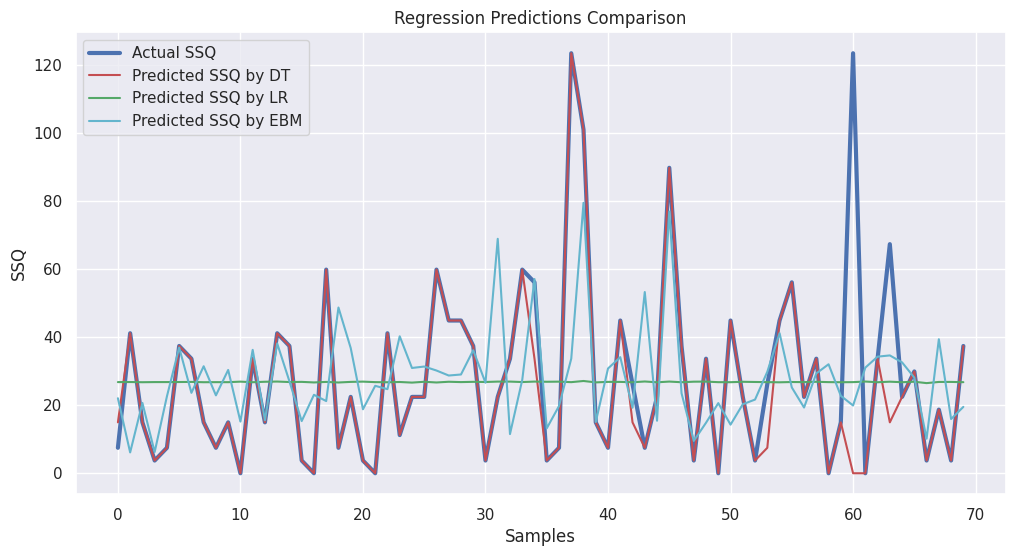

In [ ]:
# Porównanie modeli
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:70], 'b-', linewidth=3, label='Actual SSQ')
plt.plot(dt_regressor_predictions[:70], 'r-', label='Predicted SSQ by DT')
plt.plot(linear_regressor_predictions[:70], 'g-', label='Predicted SSQ by LR')
plt.plot(ebm_regressor_predictions[:70], 'c-', label='Predicted SSQ by EBM')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('SSQ')
plt.title('Regression Predictions Comparison')
plt.show()

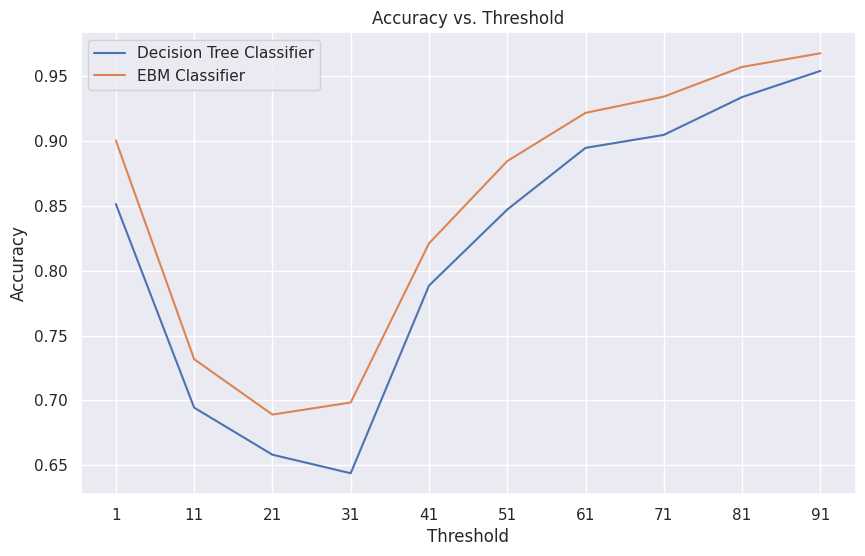

In [ ]:
# znalezienie najlepszej wartości threshold

import matplotlib.pyplot as plt

thresholds = list(range(1, 101, 10))
dt_classifier_accuracies = []
ebm_classifier_accuracies = []

# Iteracja przez różne wartości progu co 10
for threshold in thresholds:
    # Przekształcenie etykiet na klasy binarne z wybranym progiem
    y_train_binary = (y_train > threshold).astype(int)
    y_test_binary = (y_test > threshold).astype(int)

    # Trenowanie i ocena modelu Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train_binary)
    dt_classifier_predictions = dt_classifier.predict(X_test)
    dt_classifier_accuracy = accuracy_score(y_test_binary, dt_classifier_predictions)
    dt_classifier_accuracies.append(dt_classifier_accuracy)

    # Trenowanie i ocena modelu Explainable Boosting Machine Classifier
    ebm_classifier = ExplainableBoostingClassifier()
    ebm_classifier.fit(X_train, y_train_binary)
    ebm_classifier_predictions = ebm_classifier.predict(X_test)
    ebm_classifier_accuracy = accuracy_score(y_test_binary, ebm_classifier_predictions)
    ebm_classifier_accuracies.append(ebm_classifier_accuracy)

# Wykres dokładności dla poszczególnych wartości progu
plt.figure(figsize=(10, 6))
plt.plot(thresholds, dt_classifier_accuracies, label='Decision Tree Classifier')
plt.plot(thresholds, ebm_classifier_accuracies, label='EBM Classifier')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.xticks(thresholds)
plt.legend()
plt.grid(True)
plt.show()


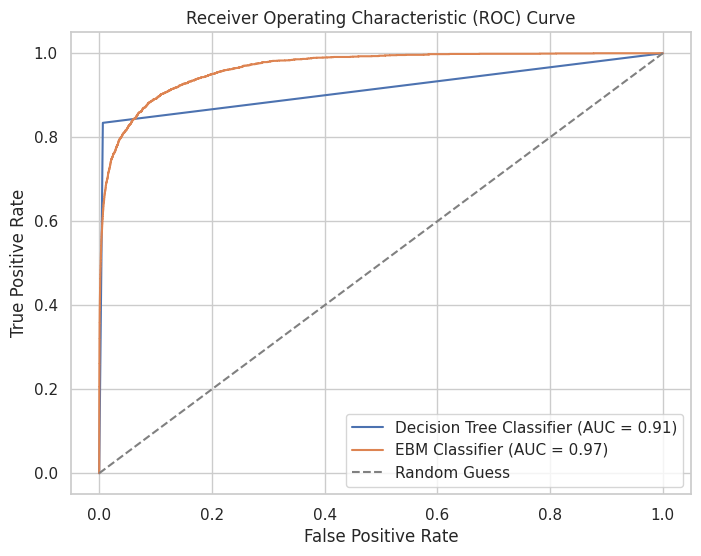

Decision Tree Classifier Confusion Matrix:
[[53417   349]
 [  393  1979]]

EBM Classifier Confusion Matrix:
[[53617   149]
 [ 1170  1202]]

Decision Tree Classifier Metrics:
Precision: 0.85
Recall: 0.83
F1-score: 0.84

EBM Classifier Metrics:
Precision: 0.89
Recall: 0.51
F1-score: 0.65


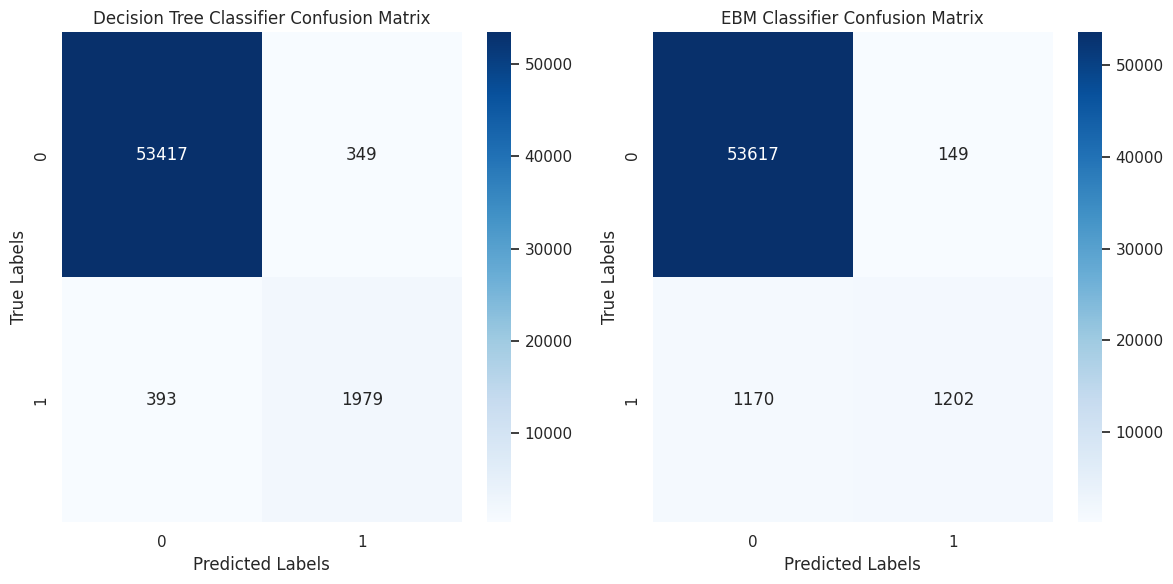

In [ ]:
# classifiers graphs

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

# Obliczenie prawdopodobieństw przewidywanych przez modele
dt_classifier_prob = dt_classifier.predict_proba(X_test)[:, 1]
ebm_classifier_prob = ebm_classifier.predict_proba(X_test)[:, 1]

# Obliczenie punktów na krzywej ROC i AUC
dt_fpr, dt_tpr, _ = roc_curve(y_test_binary, dt_classifier_prob)
dt_auc = roc_auc_score(y_test_binary, dt_classifier_prob)

ebm_fpr, ebm_tpr, _ = roc_curve(y_test_binary, ebm_classifier_prob)
ebm_auc = roc_auc_score(y_test_binary, ebm_classifier_prob)

# Rysowanie krzywych ROC
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree Classifier (AUC = {dt_auc:.2f})')
plt.plot(ebm_fpr, ebm_tpr, label=f'EBM Classifier (AUC = {ebm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Obliczenie i wyświetlenie macierzy pomyłek
dt_conf_matrix = confusion_matrix(y_test_binary, dt_classifier_predictions)
ebm_conf_matrix = confusion_matrix(y_test_binary, ebm_classifier_predictions)

print("Decision Tree Classifier Confusion Matrix:")
print(dt_conf_matrix)
print("\nEBM Classifier Confusion Matrix:")
print(ebm_conf_matrix)

# Obliczenie i wyświetlenie precyzji, czułości i F1-score
dt_precision = precision_score(y_test_binary, dt_classifier_predictions)
dt_recall = recall_score(y_test_binary, dt_classifier_predictions)
dt_f1 = f1_score(y_test_binary, dt_classifier_predictions)

ebm_precision = precision_score(y_test_binary, ebm_classifier_predictions)
ebm_recall = recall_score(y_test_binary, ebm_classifier_predictions)
ebm_f1 = f1_score(y_test_binary, ebm_classifier_predictions)

print("\nDecision Tree Classifier Metrics:")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1:.2f}")

print("\nEBM Classifier Metrics:")
print(f"Precision: {ebm_precision:.2f}")
print(f"Recall: {ebm_recall:.2f}")
print(f"F1-score: {ebm_f1:.2f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Decision Tree Confusion Matrix
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Classifier Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# EBM Confusion Matrix
sns.heatmap(ebm_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('EBM Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Epoch 1/150
5614/5614 [==============================] - 24s 4ms/step - loss: 625.0469 - mae: 18.6671 - val_loss: 596.7844 - val_mae: 18.4765
Epoch 2/150
5614/5614 [==============================] - 16s 3ms/step - loss: 591.6360 - mae: 18.2965 - val_loss: 587.2495 - val_mae: 18.5704
Epoch 3/150
5614/5614 [==============================] - 16s 3ms/step - loss: 581.4682 - mae: 18.1457 - val_loss: 572.4604 - val_mae: 18.1692
Epoch 4/150
5614/5614 [==============================] - 16s 3ms/step - loss: 572.5405 - mae: 18.0183 - val_loss: 565.1320 - val_mae: 17.9928
Epoch 5/150
5614/5614 [==============================] - 16s 3ms/step - loss: 564.7359 - mae: 17.8842 - val_loss: 561.3370 - val_mae: 17.9384
Epoch 6/150
5614/5614 [==============================] - 16s 3ms/step - loss: 557.4229 - mae: 17.7684 - val_loss: 552.1028 - val_mae: 17.4932
Epoch 7/150
5614/5614 [==============================] - 16s 3ms/step - loss: 549.5660 - mae: 17.6521 - val_loss: 544.8441 - val_mae: 17.7451
Epoch 

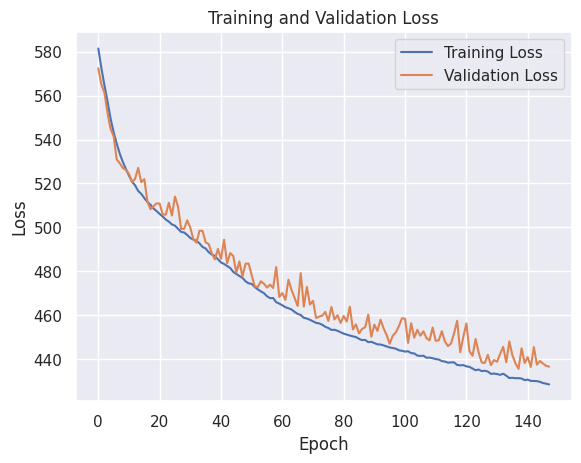

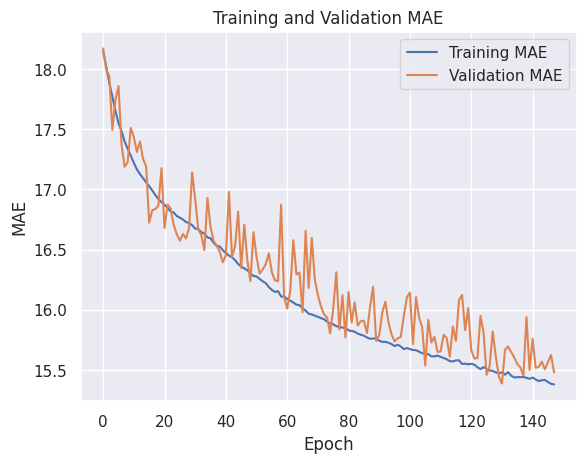

In [ ]:
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.optimizers import Adam

# Model 1
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Kompilowanie modelu
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trenowanie modelu
history1 = model1.fit(X_train, y_train, epochs=150, validation_split=0.2)

# Wykres straty (loss) dla danych treningowych i walidacyjnych
plt.plot(history1.history['loss'][2:], label='Training Loss')
plt.plot(history1.history['val_loss'][2:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Wykres metryki (MAE) dla danych treningowych i walidacyjnych
plt.plot(history1.history['mae'][2:], label='Training MAE')
plt.plot(history1.history['val_mae'][2:], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

(224551, 7)
(224551, 1, 7)
(224551, 30, 7)
Epoch 1/150
5614/5614 [==============================] - 120s 21ms/step - loss: 636.7001 - mae: 18.7849 - val_loss: 623.6935 - val_mae: 18.6308
Epoch 2/150
5614/5614 [==============================] - 119s 21ms/step - loss: 620.7216 - mae: 18.6686 - val_loss: 613.3226 - val_mae: 18.5813
Epoch 3/150
5614/5614 [==============================] - 118s 21ms/step - loss: 604.4075 - mae: 18.4892 - val_loss: 591.9125 - val_mae: 18.1127
Epoch 4/150
5614/5614 [==============================] - 116s 21ms/step - loss: 577.2172 - mae: 18.0692 - val_loss: 562.6437 - val_mae: 17.7298
Epoch 5/150
5614/5614 [==============================] - 118s 21ms/step - loss: 550.3552 - mae: 17.5836 - val_loss: 534.2292 - val_mae: 17.5006
Epoch 6/150
5614/5614 [==============================] - 116s 21ms/step - loss: 524.3159 - mae: 17.1514 - val_loss: 516.9503 - val_mae: 17.0843
Epoch 7/150
5614/5614 [==============================] - 117s 21ms/step - loss: 503.4151 - ma

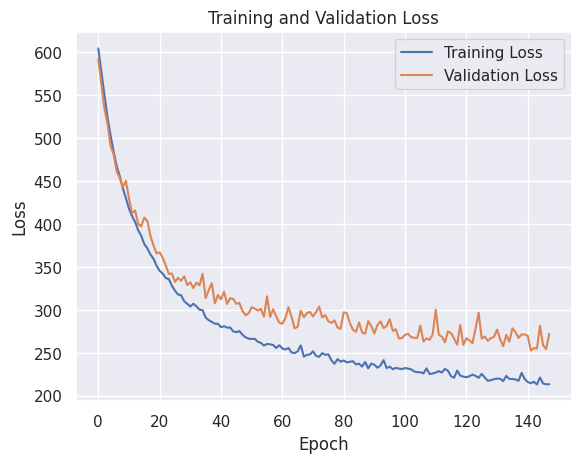

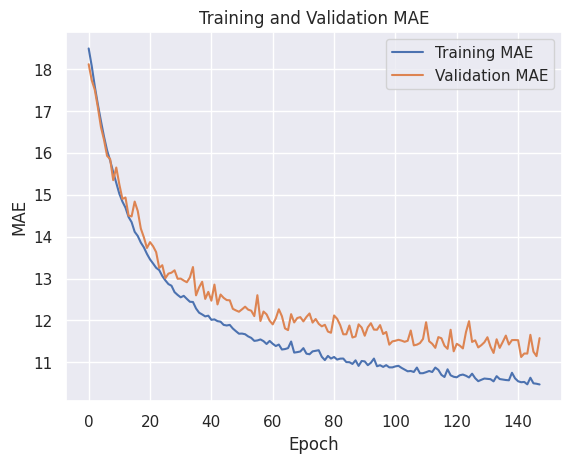

In [ ]:
# Model LSTM
from tensorflow.keras.layers import LSTM

# Rozszerz wymiar danych treningowych
# X_train_reshaped = np.expand_dims(X_train, axis=2)
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_train_reshaped = np.expand_dims(X_train, axis=2)

# Przekształć dane wejściowe
X_train_reshaped = np.expand_dims(X_train, axis=1)

# Sprawdź nowy kształt danych wejściowych
print(X_train.shape)
print(X_train_reshaped.shape)

# X_train_reshaped = np.squeeze(np.expand_dims(X_train, axis=1))
# print(X_train_reshaped.shape)
X_train_reshaped = np.repeat(X_train_reshaped, 30, axis=1)  # Powtórz cechy 30 razy
print(X_train_reshaped.shape)

timesteps = 30
features = 7

# Przykładowa architektura LSTM
model_lstm = Sequential([
    LSTM(64, input_shape=(timesteps, features)),
    Dense(1)
])

# Kompilowanie modelu
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trenowanie modelu
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=150, validation_split=0.2)

# Wykres straty (loss) dla danych treningowych i walidacyjnych
plt.plot(history_lstm.history['loss'][2:], label='Training Loss')
plt.plot(history_lstm.history['val_loss'][2:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Wykres metryki (MAE) dla danych treningowych i walidacyjnych
plt.plot(history_lstm.history['mae'][2:], label='Training MAE')
plt.plot(history_lstm.history['val_mae'][2:], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [ ]:
# hiperparametry v2

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch, HyperParameters
from keras_tuner import HyperModel

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_first_layer', min_value=7, max_value=256, step=32),
                        activation='relu', input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_first_layer', min_value=0.0, max_value=0.5, step=0.05)))
        model.add(Dense(units=hp.Int('units_second_layer', min_value=7, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_second_layer', min_value=0.0, max_value=0.5, step=0.05)))
        model.add(Dense(1))
        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mean_squared_error',
                      metrics=['mean_squared_error'])
        return model

input_shape = (X_train.shape[1],)

hypermodel = MyHyperModel(input_shape=input_shape)

tuner = RandomSearch(
    hypermodel,
    objective='val_mean_squared_error',
    max_trials=30,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuner_dropout_3050'
)


tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]

loss, mse = best_model.evaluate(X_test, y_test)
print("Test MSE: ", mse)




Trial 30 Complete [00h 01m 44s]
val_mean_squared_error: 603.5723266601562

Best val_mean_squared_error So Far: 517.7037963867188
Total elapsed time: 00h 46m 37s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 502.2311 - mean_squared_error: 502.2311
Test MSE:  502.99932861328125


Best hyperparameters found:
units_first_layer: 103
dropout_first_layer: 0.05
units_second_layer: 135
dropout_second_layer: 0.2
learning_rate: 0.007729069572956419
Trial ID: 14
Hyperparameters used:
  units_first_layer: 103
  dropout_first_layer: 0.05
  units_second_layer: 135
  dropout_second_layer: 0.2
  learning_rate: 0.007729069572956419
Final Training Loss: 499.8731689453125
Final Validation Loss: 517.7037963867188


Trial ID: 17
Hyperparameters used:
  units_first_layer: 199
  dropout_first_layer: 0.0
  units_second_layer: 39
  dropout_second_layer: 0.05
  learning_rate: 0.003663427779055978
Final Training Loss: 524.1934204101562
Final Validation Loss: 543.0188598632812


Trial ID: 02
Hyperparameters used:
  units_first_layer: 103
  dropout_first_layer: 0.05
  units_second_layer: 71
  dropout_second_layer: 0.45
  learning_rate: 0.009592209502279035
Final Training Loss: 550.9089965820312
Final Validation Loss: 548.8350830078125


Trial ID: 18
Hyperparameters used:
  units_first_lay

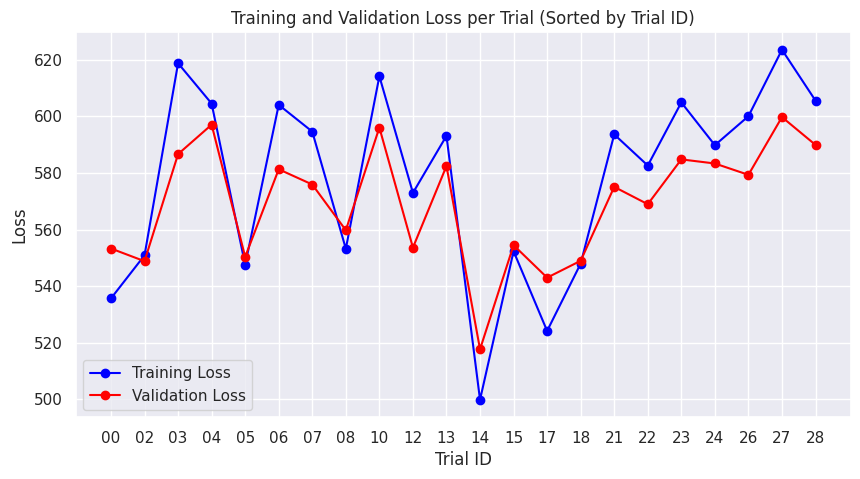

In [ ]:
# Wyniki strojenia 3050

import matplotlib.pyplot as plt

# Najlepsze hiperparametry
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

# Inicjalizuj listy do przechowywania danych do wykresów
losses = []
val_losses = []
trial_ids = []

# Wypisz hiperparametry i końcowe metryki dla każdej zakończonej próby
for trial in tuner.oracle.get_best_trials(num_trials=20):
    print(f"Trial ID: {trial.trial_id}")
    print("Hyperparameters used:")
    for param, value in trial.hyperparameters.values.items():
        print(f"  {param}: {value}")

    # Sprawdź, czy metryki są dostępne, a następnie wypisz ostatnie zarejestrowane wartości
    if 'loss' in trial.metrics.metrics and 'val_loss' in trial.metrics.metrics:
        final_loss = trial.metrics.metrics['loss'].get_last_value()
        final_val_loss = trial.metrics.metrics['val_loss'].get_last_value()
        print(f"Final Training Loss: {final_loss}")
        print(f"Final Validation Loss: {final_val_loss}")
    else:
        print("Metric data not available for this trial.")

    print("\n")

# Iteruj przez wszystkie zakończone próby
for trial in tuner.oracle.get_best_trials(num_trials=22):
    trial_ids.append(trial.trial_id)
    losses.append(trial.metrics.metrics['loss'].get_last_value())
    val_losses.append(trial.metrics.metrics['val_loss'].get_last_value())

# Połącz listy i posortuj według ID próby
combined = list(zip(trial_ids, losses, val_losses))
combined_sorted = sorted(combined, key=lambda x: x[0])  # Sort by trial ID
sorted_trial_ids, sorted_losses, sorted_val_losses = zip(*combined_sorted)

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(sorted_trial_ids, sorted_losses, 'o-', color='blue', label='Training Loss')
plt.plot(sorted_trial_ids, sorted_val_losses, 'o-', color='red', label='Validation Loss')
plt.title('Training and Validation Loss per Trial (Sorted by Trial ID)')
plt.xlabel('Trial ID')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Porównanie modeli

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Testowanie modeli regresji
regression_models = {
    "Decision Tree Regressor": dt_regressor,
    "Linear Regression": linear_regressor,
    "EBM Regressor": ebm_regressor,
    "Keras Model 1": model1,
    "Keras Model lstm": model_lstm,
}

for model_name, model in regression_models.items():
    if model_name == "Keras Model lstm":
        X_test_reshaped = np.expand_dims(X_test, axis=1)
        X_test_reshaped = np.repeat(X_test_reshaped, 30, axis=1)  # Powtórz cechy 30 razy
        y_pred = model.predict(X_test_reshaped)
    else:
        y_pred = model.predict(X_test)

    # y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print()

# Testowanie modeli klasyfikacji
classification_models = {
    "Decision Tree Classifier": dt_classifier,
    "EBM Classifier": ebm_classifier
}

for model_name, model in classification_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print()


Decision Tree Regressor:
Mean Squared Error (MSE): 178.49849992518438
Mean Absolute Error (MAE): 3.844462574370309

Linear Regression:
Mean Squared Error (MSE): 634.6190252311699
Mean Absolute Error (MAE): 18.820834830447495

EBM Regressor:
Mean Squared Error (MSE): 428.01760495490555
Mean Absolute Error (MAE): 15.276940618268632

1755/1755 [==============================] - 3s 2ms/step
Keras Model 1:
Mean Squared Error (MSE): 441.3918230938935
Mean Absolute Error (MAE): 15.561118740227512

1755/1755 [==============================] - 12s 7ms/step
Keras Model lstm:
Mean Squared Error (MSE): 268.6220591682612
Mean Absolute Error (MAE): 11.552814803651803

Decision Tree Classifier:
Accuracy: 0.9867825715201824

EBM Classifier:
Accuracy: 0.9765043286187609



1755/1755 [==============================] - 13s 8ms/step


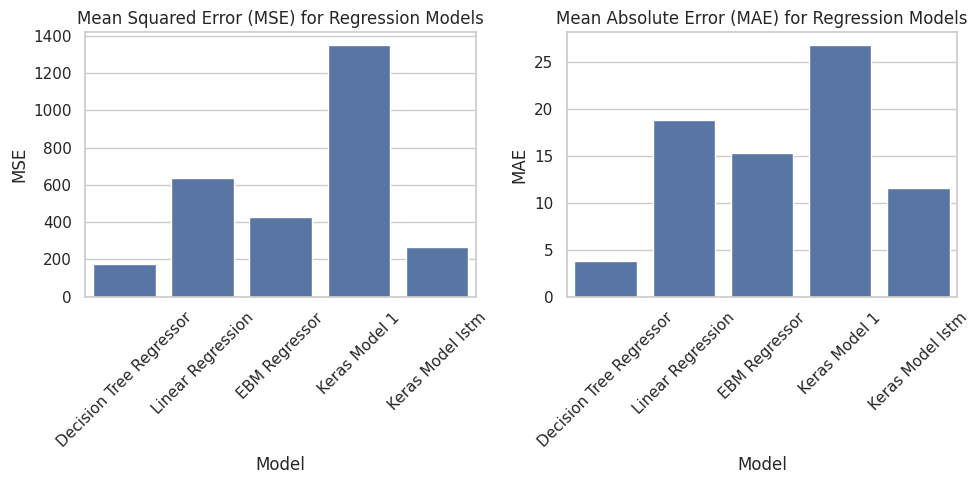

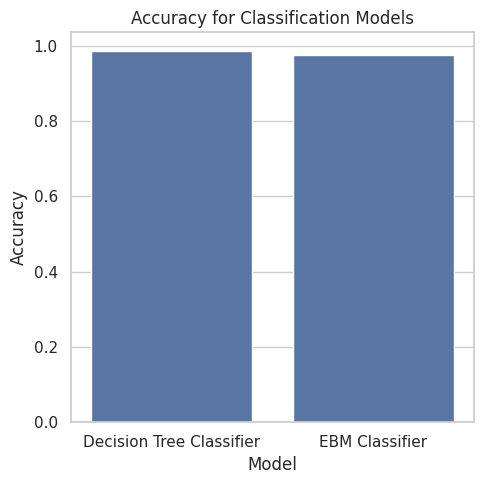

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

sns.set(style="whitegrid")

# Testowanie modeli regresji
regression_models = {
    "Decision Tree Regressor": dt_regressor,
    "Linear Regression": linear_regressor,
    "EBM Regressor": ebm_regressor,
    "Keras Model 1": model,
    "Keras Model lstm": model_lstm,
}

# Przechowywanie wyników
regression_results = {
    "Model": [],
    "MSE": [],
    "MAE": []
}

# Testowanie modeli regresji
for model_name, model in regression_models.items():
    if model_name == "Keras Model lstm":
        X_test_reshaped = np.expand_dims(X_test, axis=1)
        X_test_reshaped = np.repeat(X_test_reshaped, 30, axis=1)  # Powtórz cechy 30 razy
        y_pred = model.predict(X_test_reshaped)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    regression_results["Model"].append(model_name)
    regression_results["MSE"].append(mse)
    regression_results["MAE"].append(mae)

# Tworzenie wykresów dla modeli regresji
plt.figure(figsize=(10, 5))

# Wykres MSE
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MSE", data=pd.DataFrame(regression_results))
plt.title('Mean Squared Error (MSE) for Regression Models')
plt.xticks(rotation=45)

# Wykres MAE
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="MAE", data=pd.DataFrame(regression_results))
plt.title('Mean Absolute Error (MAE) for Regression Models')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Testowanie modeli klasyfikacji
classification_models = {
    "Decision Tree Classifier": dt_classifier,
    "EBM Classifier": ebm_classifier
}

# Przechowywanie wyników
classification_results = {
    "Model": [],
    "Accuracy": []
}

# Testowanie modeli klasyfikacji
for model_name, model in classification_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_binary, y_pred)

    classification_results["Model"].append(model_name)
    classification_results["Accuracy"].append(accuracy)

# Tworzenie wykresów dla modeli klasyfikacji
plt.figure(figsize=(5, 5))

# Wykres Accuracy
sns.barplot(x="Model", y="Accuracy", data=pd.DataFrame(classification_results))
plt.title('Accuracy for Classification Models')
# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Wybierz dowolną sesję
session_name = list(data.keys())[150]  # Zmienić na rzeczywistą nazwę sesji, jeśli jest inna

# Wydrukuj atrybuty obiektu 'oneTest' dla tej sesji
print(dir(data[session_name]))

# Spróbuj uzyskać dostęp do 'Questionnaire' i wydrukować jego atrybuty
try:
    print(dir(data[session_name].Questionnaire))
except AttributeError:
    print(f"Obiekt 'oneTest' dla sesji {session_name} nie ma atrybutu 'Questionnaire'.")


['Empatica', 'Name', 'Order', 'SicknessLevel', 'Steam', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'reSampling', 'reSamplingDataFrame', 'resampleHead', 'resampleRotation', 'resampleSpeed', 'resampleSteam']
Obiekt 'oneTest' dla sesji Zhilonggroup3 nie ma atrybutu 'Questionnaire'.


In [ ]:
# @title Zrozumienie struktury danych (nie potrzebna sekcja)

sample = list(data.values())[157]  # dziesiaty przykład danych

#print("Klucze w danych:", data.keys())
#print(vars(sample))
print(vars(sample.SicknessLevel))
#print(vars(sample.Steam))
#print(vars(sample.Empatica))

In [ ]:
# @title Kod backup

# Załóżmy, że 'data' to Twój słownik zawierający wszystkie sesje
time_series_data = {}  # Słownik do przechowywania danych szeregów czasowych dla każdej sesji

# Wybieramy interesujące nas zmienne i kolumny
variables_columns = {
    'BVP': ['Time', 'BVP'],
    'GSR': ['Time', 'GSR'],
    'HR': ['Time', 'HR'],
    'TEM': ['Time', 'TEM'],
    'rawHead': ['Time', 'local_X', 'local_Y', 'local_Z']
}

for session_name, session in data.items():
    print(f"Próbka sesji: {session_name}")

    session_data = {}

    for variable_name, columns in variables_columns.items():
        if variable_name in ['BVP', 'GSR', 'HR', 'TEM']:
            df = getattr(session.Empatica, variable_name)[columns]  # Używamy getattr zamiast indeksowania
        else:
            df = getattr(session.Steam, variable_name)[columns]  # Używamy getattr zamiast indeksowania dla 'rawHead'

        # Konwersja kolumny 'Time' na datetime, jeśli jest to konieczne
        #if not pd.api.types.is_datetime64_any_dtype(df['Time']):
            #df['Time'] = pd.to_datetime(df['Time'])

        # Ustawienie kolumny 'Time' jako indeks
        #df.set_index('Time', inplace=True)

        # Przechowywanie przetworzonych danych dla każdej zmiennej w słowniku
        session_data[variable_name] = df

        print(f"Dane dla zmiennej {variable_name}:")
        print(df)
        print("\n")

    # Dodanie przetworzonych danych sesji do słownika
    time_series_data[session_name] = session_data
# W tym miejscu masz przetworzone dane szeregów czasowych dla każdej sesji i zmiennej